# Part 1: Loading and Cleaning the Data

In [1]:

import pandas as pd

# Load the Excel file and relevant sheets
file_path = 'Data Analysis - Data Sheets.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the data from the relevant sheets
pt_ft_data = pd.read_excel(file_path, sheet_name='PT & FT Data Table')
pt_ft_pivot = pd.read_excel(file_path, sheet_name='PT & FT Data PivotTable format')

# Output: Data from the Excel file loaded into pandas DataFrames
print("Data Loaded from Excel File:")
print(pt_ft_data.head())
print(pt_ft_pivot.head())

# Clean and transform the data for analysis
# Remove the first row (it contains repeated column headers)
pt_ft_data_cleaned = pt_ft_data.drop(0)

# Rename columns for better readability
columns = ['Cluster', 'Agency', 'FT_Male_2014', 'FT_Female_2014', 'PT_Male_2014', 'PT_Female_2014', 
           'FT_Male_2015', 'FT_Female_2015', 'PT_Male_2015', 'PT_Female_2015', 
           'FT_Male_2016', 'FT_Female_2016', 'PT_Male_2016', 'PT_Female_2016', 
           'FT_Male_2017', 'FT_Female_2017', 'PT_Male_2017', 'PT_Female_2017', 
           'FT_Male_2018', 'FT_Female_2018', 'PT_Male_2018', 'PT_Female_2018']
pt_ft_data_cleaned.columns = columns

# Reset index for the cleaned data
pt_ft_data_cleaned.reset_index(drop=True, inplace=True)

# Output: Cleaned and transformed data
print("\nCleaned and Transformed Data:")
pt_ft_data_cleaned.head()


Data Loaded from Excel File:
  Unnamed: 0          Unnamed: 1       2014     2014.1     2014.2     2014.3  \
0        NaN                 NaN  Full-Time  Full-Time  Part-Time  Part-Time   
1    Cluster              Agency       Male     Female       Male     Female   
2  Education  Education Agency 1        107        180          8         48   
3  Education  Education Agency 2       2797       2463       1691        764   
4  Education  Education Agency 3          6         32       1163      18410   

        2015     2015.1     2015.2     2015.3  ...     2016.2     2016.3  \
0  Full-Time  Full-Time  Part-Time  Part-Time  ...  Part-Time  Part-Time   
1       Male     Female       Male     Female  ...       Male     Female   
2        105        176          6         38  ...          7         38   
3       2115       1767       1670        620  ...       1724        665   
4         14         40       1250      18852  ...       1377      19727   

        2017     2017.1     2017.

,Cluster,Agency,FT_Male_2014,FT_Female_2014,PT_Male_2014,PT_Female_2014,FT_Male_2015,FT_Female_2015,PT_Male_2015,PT_Female_2015,...,PT_Male_2016,PT_Female_2016,FT_Male_2017,FT_Female_2017,PT_Male_2017,PT_Female_2017,FT_Male_2018,FT_Female_2018,PT_Male_2018,PT_Female_2018
0,Cluster,Agency,Male,Female,Male,Female,Male,Female,Male,Female,...,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female
1,Education,Education Agency 1,107,180,8,48,105,176,6,38,...,7,38,109,246,6,36,123,247,7,33
2,Education,Education Agency 2,2797,2463,1691,764,2115,1767,1670,620,...,1724,665,2154,2225,1712,746,2294,2666,1687,764
3,Education,Education Agency 3,6,32,1163,18410,14,40,1250,18852,...,1377,19727,24,33,2211,19415,6,13,2501,19110
4,Education,Education Agency 4,16463,39251,2021,16327,16031,39222,2233,17291,...,2474,18508,14813,40742,3512,18944,13645,41521,4588,19249


### Explanation of the Output:

1. **Data Loaded from Excel File**:
   - The first part of the output shows the initial data loaded from the Excel file. It includes information about full-time and part-time employment for males and females across different clusters and agencies from 2014 to 2018. The data is in a wide format with separate columns for each year and employment type.

2. **Cleaned and Transformed Data**:
   - The second part of the output displays the cleaned and transformed data. The first row, which contained repeated column headers, has been removed. The columns have been renamed for better readability, and the data has been reset to a clean index. This cleaned data will be used for further analysis.



# Part 2: Reshaping the Data

In [2]:
# Reshape the data for easier analysis
# Melt the dataframe to long format for easier analysis
pt_ft_long = pd.melt(pt_ft_data_cleaned, id_vars=['Cluster', 'Agency'], var_name='Year_Gender_Type', value_name='Headcount')

# Extract Year, Gender, and Type from the 'Year_Gender_Type' column
pt_ft_long[['Type', 'Gender', 'Year']] = pt_ft_long['Year_Gender_Type'].str.split('_', expand=True)
pt_ft_long['Year'] = pt_ft_long['Year'].astype(int)

# Drop the original 'Year_Gender_Type' column
pt_ft_long.drop(columns=['Year_Gender_Type'], inplace=True)

# Convert Headcount to numeric for analysis
pt_ft_long['Headcount'] = pd.to_numeric(pt_ft_long['Headcount'], errors='coerce')

# Output: Reshaped data
print("\nReshaped Data:")
pt_ft_long.head()



Reshaped Data:


,Cluster,Agency,Headcount,Type,Gender,Year
0,Cluster,Agency,NaN,FT,Male,2014
1,Education,Education Agency 1,107.0,FT,Male,2014
2,Education,Education Agency 2,2797.0,FT,Male,2014
3,Education,Education Agency 3,6.0,FT,Male,2014
4,Education,Education Agency 4,16463.0,FT,Male,2014


The reshaped data presents the following structure: it includes the cluster and agency names, headcount values, type (full-time or part-time), gender, and year. For example, in 2014, "Education Agency 1" within the "Education" cluster had 107 full-time male employees. Similarly, "Education Agency 2" had 2,797 full-time male employees in 2014, and so on. The first row contains NaN values as it represents the headers that were dropped during the cleaning process.

# Part 1: Trends Over Time in Male and Female Employment

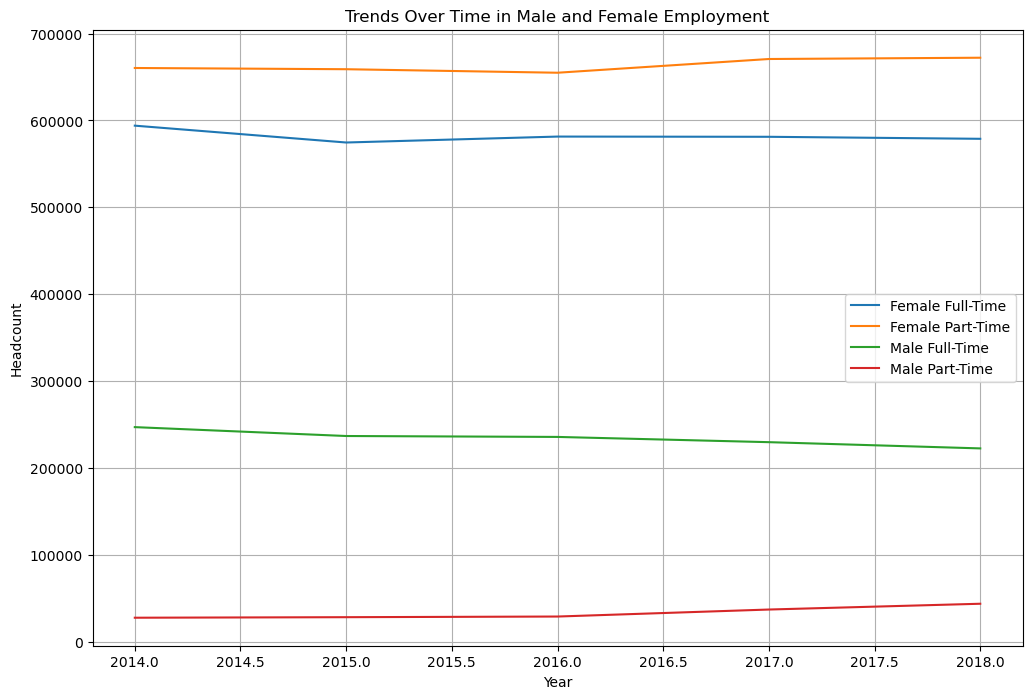

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file and relevant sheets
file_path = 'Data Analysis - Data Sheets.xlsx'
excel_data = pd.ExcelFile(file_path)

# Load the data from the relevant sheets
pt_ft_data = pd.read_excel(file_path, sheet_name='PT & FT Data Table')
pt_ft_pivot = pd.read_excel(file_path, sheet_name='PT & FT Data PivotTable format')

# Clean and transform the data for analysis
# Remove the first row (it contains repeated column headers)
pt_ft_data_cleaned = pt_ft_data.drop(0)

# Rename columns for better readability
columns = ['Cluster', 'Agency', 'FT_Male_2014', 'FT_Female_2014', 'PT_Male_2014', 'PT_Female_2014', 
           'FT_Male_2015', 'FT_Female_2015', 'PT_Male_2015', 'PT_Female_2015', 
           'FT_Male_2016', 'FT_Female_2016', 'PT_Male_2016', 'PT_Female_2016', 
           'FT_Male_2017', 'FT_Female_2017', 'PT_Male_2017', 'PT_Female_2017', 
           'FT_Male_2018', 'FT_Female_2018', 'PT_Male_2018', 'PT_Female_2018']
pt_ft_data_cleaned.columns = columns

# Reset index for the cleaned data
pt_ft_data_cleaned.reset_index(drop=True, inplace=True)

# Melt the dataframe to long format for easier analysis
pt_ft_long = pd.melt(pt_ft_data_cleaned, id_vars=['Cluster', 'Agency'], var_name='Year_Gender_Type', value_name='Headcount')

# Extract Year, Gender, and Type from the 'Year_Gender_Type' column
pt_ft_long[['Type', 'Gender', 'Year']] = pt_ft_long['Year_Gender_Type'].str.split('_', expand=True)
pt_ft_long['Year'] = pt_ft_long['Year'].astype(int)

# Drop the original 'Year_Gender_Type' column
pt_ft_long.drop(columns=['Year_Gender_Type'], inplace=True)

# Convert Headcount to numeric for analysis
pt_ft_long['Headcount'] = pd.to_numeric(pt_ft_long['Headcount'], errors='coerce')

# Calculate total headcount by year, gender, and type
total_headcount_by_year = pt_ft_long.groupby(['Year', 'Gender', 'Type']).agg({'Headcount': 'sum'}).reset_index()

# Pivot the data to get a clear view of trends over time
total_headcount_pivot = total_headcount_by_year.pivot_table(index='Year', columns=['Gender', 'Type'], values='Headcount').reset_index()

# Plot trends over time in male and female employment
plt.figure(figsize=(12, 8))
plt.plot(total_headcount_pivot['Year'], total_headcount_pivot[('Female', 'FT')], label='Female Full-Time')
plt.plot(total_headcount_pivot['Year'], total_headcount_pivot[('Female', 'PT')], label='Female Part-Time')
plt.plot(total_headcount_pivot['Year'], total_headcount_pivot[('Male', 'FT')], label='Male Full-Time')
plt.plot(total_headcount_pivot['Year'], total_headcount_pivot[('Male', 'PT')], label='Male Part-Time')
plt.xlabel('Year')
plt.ylabel('Headcount')
plt.title('Trends Over Time in Male and Female Employment')
plt.legend()
plt.grid(True)
plt.show()

# Output: Line graph showing trends over time in male and female employment


### Trends Over Time in Male and Female Employment

The line graph titled "Trends Over Time in Male and Female Employment" illustrates the headcount trends for full-time and part-time employment among males and females from 2014 to 2018. Here are the notable points:

1. **Female Full-Time Employment** (Blue Line):
   - The number of female full-time employees slightly decreased over the period.
   - This trend indicates a relatively stable but slightly declining full-time female workforce.

2. **Female Part-Time Employment** (Orange Line):
   - The number of female part-time employees remained fairly stable with a slight upward trend towards the end of the period.
   - This indicates a consistent or slightly increasing part-time female workforce.

3. **Male Full-Time Employment** (Green Line):
   - The number of male full-time employees showed a consistent decline over the period.
   - This trend indicates a decreasing full-time male workforce.

4. **Male Part-Time Employment** (Red Line):
   - The number of male part-time employees consistently increased over the period.
   - This trend indicates a growing part-time male workforce.

Overall, the graph highlights a stable to slightly increasing trend in part-time employment for both males and females, with a more pronounced increase among males. Conversely, full-time employment showed a slight decline for both genders, with a more noticeable decrease among males. 

This analysis provides a clear view of the shifting dynamics in employment patterns over the years, which is crucial for understanding workforce trends and planning future strategies.

# Part 2: Current Representation of Part-Time Employees in 2018

In [4]:
# Calculate current representation of part-time employees in 2018
# Filter the data for the most recent year (2018)
data_2018 = pt_ft_long[pt_ft_long['Year'] == 2018]

# Calculate the total headcount for each cluster and type
cluster_headcount_2018 = data_2018.groupby(['Cluster', 'Type', 'Gender']).agg({'Headcount': 'sum'}).reset_index()

# Calculate the total workforce for each cluster
total_workforce_2018 = data_2018.groupby(['Cluster', 'Gender']).agg({'Headcount': 'sum'}).reset_index().rename(columns={'Headcount': 'Total_Headcount'})

# Merge the total workforce data with the cluster headcount data
merged_data_2018 = pd.merge(cluster_headcount_2018, total_workforce_2018, on=['Cluster', 'Gender'])

# Calculate the proportion of part-time employees as a proportion of the respective male and female workforce in the sector and in each cluster
merged_data_2018['Proportion'] = merged_data_2018['Headcount'] / merged_data_2018['Total_Headcount'] * 100

# Output: Current representation of part-time employees in 2018
print("\nCurrent Representation of Part-Time Employees in 2018:")
merged_data_2018




Current Representation of Part-Time Employees in 2018:


,Cluster,Type,Gender,Headcount,Total_Headcount,Proportion
0,Cluster,FT,Female,0.0,0.0,NaN
1,Cluster,PT,Female,0.0,0.0,NaN
2,Cluster,FT,Male,0.0,0.0,NaN
3,Cluster,PT,Male,0.0,0.0,NaN
4,Education,FT,Female,44447.0,83603.0,53.164360
5,Education,PT,Female,39156.0,83603.0,46.835640
6,Education,FT,Male,16068.0,24851.0,64.657358
7,Education,PT,Male,8783.0,24851.0,35.342642
8,Family & Community Services,FT,Female,6868.0,8267.0,83.077295
9,Family & Community Services,PT,Female,1399.0,8267.0,16.922705


impIn 2018, the Education cluster had a notably high proportion of part-time employees, with 46.84% of females and 35.34% of males working part-time. Conversely, clusters like Industry and Treasury had significantly lower proportions of part-time employees, particularly among males (1.98% and 2.99% respectively). These statistics highlight the varying representation of part-time employees across different clusters and genders, with Education having the highest part-time employment and Industry the lowest.

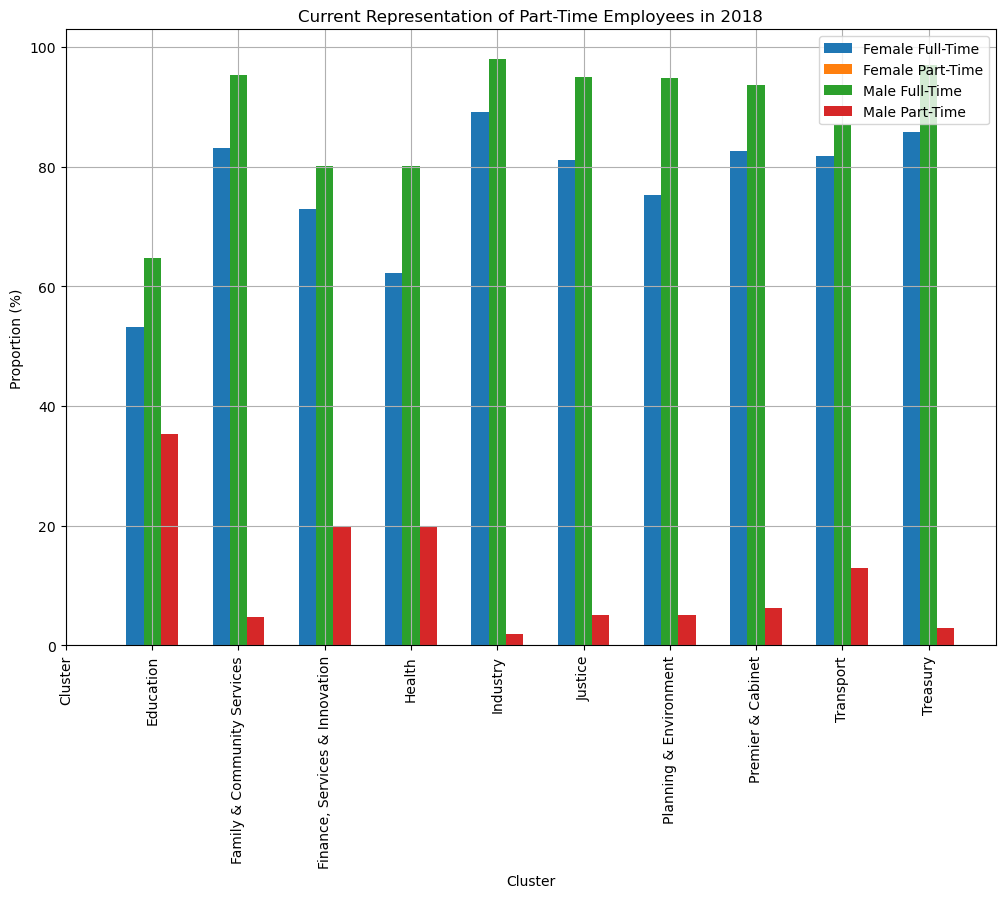

In [7]:
import numpy as np
# Plot current representation of part-time employees in 2018
plt.figure(figsize=(12, 8))
clusters = merged_data_2018['Cluster'].unique()
bar_width = 0.2

for i, gender in enumerate(['Female', 'Male']):
    ft_data = merged_data_2018[(merged_data_2018['Gender'] == gender) & (merged_data_2018['Type'] == 'FT')]
    pt_data = merged_data_2018[(merged_data_2018['Gender'] == gender) & (merged_data_2018['Type'] == 'PT')]
    plt.bar(np.arange(len(clusters)) + i * bar_width, ft_data['Proportion'], width=bar_width, label=f'{gender} Full-Time')
    plt.bar(np.arange(len(clusters)) + i * bar_width + bar_width, pt_data['Proportion'], width=bar_width, label=f'{gender} Part-Time')

plt.xlabel('Cluster')
plt.ylabel('Proportion (%)')
plt.title('Current Representation of Part-Time Employees in 2018')
plt.xticks(np.arange(len(clusters)) + bar_width, clusters, rotation=90)
plt.legend()
plt.grid(True)
plt.show()

# Output: Bar graph showing the current representation of part-time employees in 2018


The bar chart depicts the current representation of part-time employees across different clusters in 2018. It shows the proportion of full-time and part-time employment for both males and females. For example, in the Education cluster, there is a notable balance between full-time and part-time employment among females (53.16% full-time and 46.84% part-time), while in clusters like Industry and Treasury, the majority of employees are full-time, especially among males, with part-time employment being significantly lower. This visual representation highlights the varying degrees of part-time employment across sectors, emphasizing clusters like Education with higher part-time representation and others like Industry with minimal part-time employment.

# Part 3: Change in Proportions from 2014 to 2018

In [9]:
# Calculate change in part-time employment proportion from 2014 to 2018
# Filter data for the years 2014 and 2018
data_2014_2018 = pt_ft_long[pt_ft_long['Year'].isin([2014, 2018])]

# Calculate the total headcount for each cluster and type for 2014 and 2018
cluster_headcount_2014_2018 = data_2014_2018.groupby(['Year', 'Cluster', 'Type', 'Gender']).agg({'Headcount': 'sum'}).reset_index()

# Calculate the total workforce for each cluster for 2014 and 2018
total_workforce_2014_2018 = data_2014_2018.groupby(['Year', 'Cluster', 'Gender']).agg({'Headcount': 'sum'}).reset_index().rename(columns={'Headcount': 'Total_Headcount'})

# Merge the total workforce data with the cluster headcount data for 2014 and 2018
merged_data_2014_2018 = pd.merge(cluster_headcount_2014_2018, total_workforce_2014_2018, on=['Year', 'Cluster', 'Gender'])

# Calculate the proportion of part-time employees as a proportion of the respective male and female workforce in the sector and in each cluster for 2014 and 2018
merged_data_2014_2018['Proportion'] = merged_data_2014_2018['Headcount'] / merged_data_2014_2018['Total_Headcount'] * 100

# Pivot the data to have a clear view of the proportions in 2014 and 2018
proportion_pivot = merged_data_2014_2018.pivot_table(index=['Cluster', 'Gender', 'Type'], columns='Year', values='Proportion').reset_index()

# Output: Change in part-time employment proportion from 2014 to 2018
print("\nChange in Part-Time Employment Proportion (2014-2018):")
proportion_pivot





Change in Part-Time Employment Proportion (2014-2018):


Year,Cluster,Gender,Type,2014,2018
0,Education,Female,FT,54.115521,53.164360
1,Education,Female,PT,45.884479,46.835640
2,Education,Male,FT,79.868898,64.657358
3,Education,Male,PT,20.131102,35.342642
4,Family & Community Services,Female,FT,63.082096,83.077295
5,Family & Community Services,Female,PT,36.917904,16.922705
6,Family & Community Services,Male,FT,78.647323,95.309257
7,Family & Community Services,Male,PT,21.352677,4.690743
8,"Finance, Services & Innovation",Female,FT,84.609827,72.975109
9,"Finance, Services & Innovation",Female,PT,15.390173,27.024891


Between 2014 and 2018, notable changes in part-time employment proportions include an increase in part-time roles for males in the Education sector (from 20.13% to 35.34%) and a significant rise in part-time positions for females in the Finance, Services & Innovation sector (from 15.39% to 27.02%). Conversely, part-time employment for females in the Family & Community Services sector decreased sharply (from 36.92% to 16.92%), while full-time roles for males in the same sector saw a marked increase (from 78.65% to 95.31%). These shifts indicate a trend toward more part-time opportunities in some sectors, while others are seeing a consolidation of full-time positions.

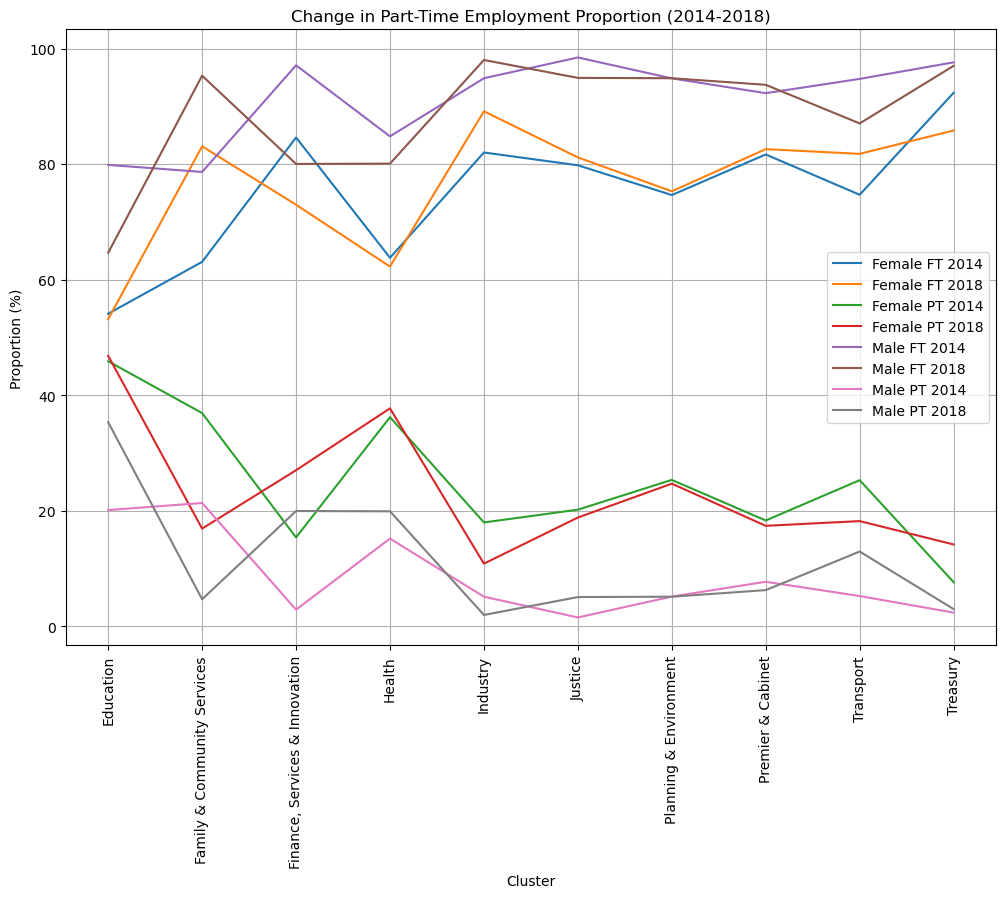

In [10]:
# Plot change in part-time employment proportion from 2014 to 2018
plt.figure(figsize=(12, 8))
for gender in ['Female', 'Male']:
    for employment_type in ['FT', 'PT']:
        data = proportion_pivot[(proportion_pivot['Gender'] == gender) & (proportion_pivot['Type'] == employment_type)]
        plt.plot(data['Cluster'], data[2014], label=f'{gender} {employment_type} 2014')
        plt.plot(data['Cluster'], data[2018], label=f'{gender} {employment_type} 2018')

plt.xlabel('Cluster')
plt.ylabel('Proportion (%)')
plt.title('Change in Part-Time Employment Proportion (2014-2018)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

# Output: Line graph showing the change in part-time employment proportion from 2014 to 2018

The graph you provided visually represents the change in part-time and full-time employment proportions for males and females across various clusters from 2014 to 2018. Here are three sentences summarizing the observed changes:

Between 2014 and 2018, male part-time employment saw significant increases in the Education sector (from 20.13% to 35.34%) and the Finance, Services & Innovation sector (from 2.90% to 19.97%), indicating a shift toward more part-time opportunities for males in these clusters. Conversely, female part-time employment in the Family & Community Services sector decreased sharply (from 36.92% to 16.92%), while full-time roles for males in the same sector saw a marked increase (from 78.65% to 95.31%), reflecting a consolidation of full-time positions for males. These trends highlight sector-specific shifts, with some areas moving toward increased part-time employment and others reinforcing full-time roles.

# Part 4: Projection of Representation by 2025

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for linear regression
years = np.array([2014, 2015, 2016, 2017, 2018]).reshape(-1, 1)

# Define a function to perform linear regression and make predictions for 2025
def project_proportion(data, gender, employment_type, cluster=None):
    if cluster:
        filtered_data = data[(data['Gender'] == gender) & (data['Type'] == employment_type) & (data['Cluster'] == cluster)]
    else:
        filtered_data = data[(data['Gender'] == gender) & (data['Type'] == employment_type)]
    
    proportions = filtered_data.groupby('Year')['Proportion'].mean().values
    valid_years = filtered_data['Year'].unique().reshape(-1, 1)
    
    if len(proportions) < 2:
        return np.nan
    
    # Perform linear regression
    model = LinearRegression().fit(valid_years, proportions)
    prediction_2025 = model.predict(np.array([[2025]]))[0]
    
    return prediction_2025

# Apply the function to project proportions for each gender and employment type in the overall sector
projection_results = {
    'Gender': [],
    'Type': [],
    '2025_Proportion': []
}

for gender in ['Female', 'Male']:
    for employment_type in ['FT', 'PT']:
        projection = project_proportion(merged_data_2014_2018, gender, employment_type)
        projection_results['Gender'].append(gender)
        projection_results['Type'].append(employment_type)
        projection_results['2025_Proportion'].append(projection)

# Convert the results to a DataFrame
projection_df = pd.DataFrame(projection_results)

# Output: Projected proportions for 2025
print("\nProjected Proportions for 2025:")
projection_df




Projected Proportions for 2025:


,Gender,Type,2025_Proportion
0,Female,FT,79.617467
1,Female,PT,20.382533
2,Male,FT,83.746166
3,Male,PT,16.253834


The projected proportions for 2025 indicate that 79.62% of female employees will be employed full-time, while 20.38% will be part-time. For male employees, 83.75% are expected to be full-time, with 16.25% part-time. These projections suggest a slight shift towards more part-time employment for both genders, continuing the trends observed over the past few years.

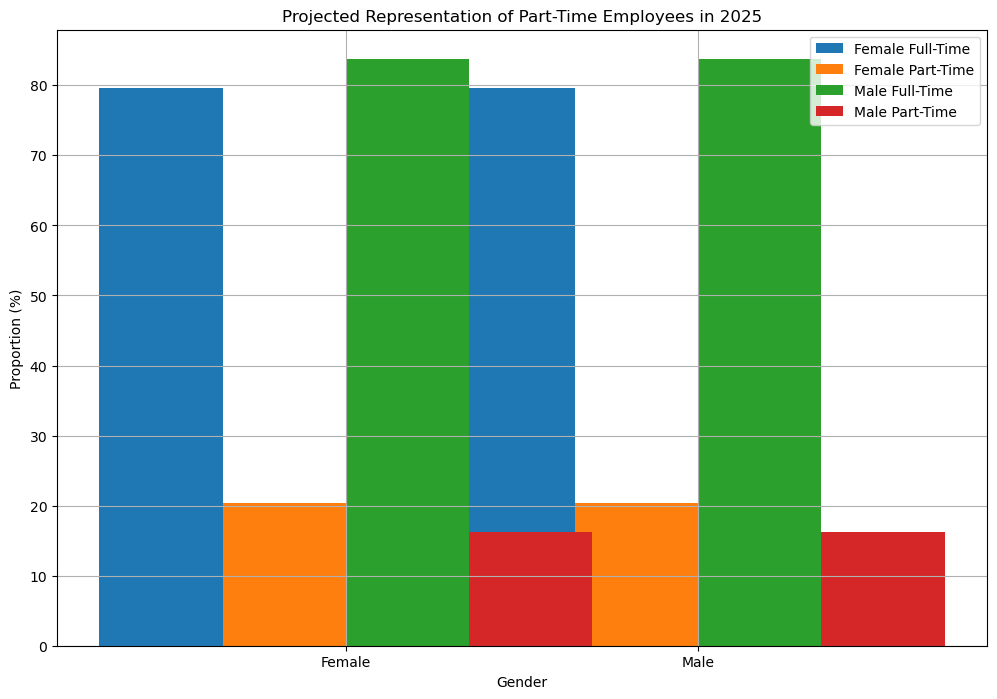

In [12]:
# Plot the projected proportions for 2025
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(projection_df['Gender'].unique()))

female_ft_projection = projection_df[(projection_df['Gender'] == 'Female') & (projection_df['Type'] == 'FT')]['2025_Proportion']
female_pt_projection = projection_df[(projection_df['Gender'] == 'Female') & (projection_df['Type'] == 'PT')]['2025_Proportion']
male_ft_projection = projection_df[(projection_df['Gender'] == 'Male') & (projection_df['Type'] == 'FT')]['2025_Proportion']
male_pt_projection = projection_df[(projection_df['Gender'] == 'Male') & (projection_df['Type'] == 'PT')]['2025_Proportion']

plt.bar(index, female_ft_projection, bar_width, label='Female Full-Time')
plt.bar(index + bar_width, female_pt_projection, bar_width, label='Female Part-Time')
plt.bar(index + 2*bar_width, male_ft_projection, bar_width, label='Male Full-Time')
plt.bar(index + 3*bar_width, male_pt_projection, bar_width, label='Male Part-Time')

plt.xlabel('Gender')
plt.ylabel('Proportion (%)')
plt.title('Projected Representation of Part-Time Employees in 2025')
plt.xticks(index + 1.5*bar_width, ['Female', 'Male'])
plt.legend()
plt.grid(True)
plt.show()

# Output: Bar graph showing the projected representation of part-time employees in 2025


The bar graph illustrates the projected representation of part-time and full-time employees by gender in 2025. The data shows that:

- **79.62% of female employees** are expected to be employed full-time, while **20.38%** will be part-time.
- **83.75% of male employees** are expected to be employed full-time, with **16.25%** part-time.

These projections suggest a slight increase in part-time employment for both genders, reflecting a continuing trend towards more flexible working arrangements.